In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import pickle
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import GradientBoostingRegressor

from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [2]:
# path = 'continuous_train.csv'
# data = pd.read_csv(path, sep = ',', na_filter = False)
data = pd.read_csv('max_data/SixAirlinesDataV2.csv', sep = ',', encoding = 'UTF-8')
#datos = data.set_index('id')

data=data.drop(columns='Unnamed: 0')
data
X_train = data.drop(columns = ['PriceEconomy']).copy()
y_train = data[['PriceEconomy']].copy()

In [3]:
y_train = (y_train- y_train.min())/(y_train.max() - y_train.min())*10

In [4]:
def calculated_metrics(variablesSelected,X_trained_scaled,y_train,X_test_scaled,y_test):
    X_trained_scaled_aux = X_trained_scaled[variablesSelected].copy()
    X_test_scaled_aux = X_test_scaled[variablesSelected].copy()
    ## Regresion para cada cantidad de variables
    regr = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                   normalize=False)

    # Train the model using the training sets
    regr.fit(X_trained_scaled_aux,  y_train['PriceEconomy'].values)

    # Make predictions using the testing set
    y_pred = regr.predict(X_test_scaled_aux)

    y_pred = pd.DataFrame(y_pred, index=y_test.index, columns=["y_pred"])

    total = y_pred.join(y_test)
    total['y_menor_-1'] = (total['PriceEconomy']<-1).astype(int)
    total['y_pred_menor_-1'] = (total['y_pred']<-1).astype(int)
    total['good_class'] = (total['y_menor_-1']==total['y_pred_menor_-1']).astype(int)
    mse = mean_squared_error(y_test, y_pred)
    accuray =total['good_class'].sum()/len(total)
    r2 = r2_score(y_test, y_pred)
    return mse,accuray,r2

In [12]:
modelToProof = [['Airline','Aircraft','FlightDuration','IsInternational','SeatsEconomy','SeatsPremium','PitchPremium','SeatsTotal','PitchEconomy','WidthEconomy','WidthPremium','PriceRelative','PricePremium','PercentPremiumSeats','PitchDifference','WidthDifference','month_num']]

In [13]:
# modelToProof = [['Airline','Aircraft','FlightDuration','IsInternational','SeatsEconomy','SeatsPremium','PitchEconomy','WidthEconomy','WidthPremium','PriceRelative','PricePremium','PercentPremiumSeats','month_num']]

In [14]:
modelToProof.append(['Airline','Aircraft','FlightDuration','IsInternational','SeatsEconomy','SeatsPremium','PitchEconomy','WidthEconomy','WidthPremium','PriceRelative','PricePremium','PercentPremiumSeats','month_num'])

In [15]:
modelToProof.append(['Airline','Aircraft','FlightDuration','IsInternational','SeatsEconomy','SeatsPremium','PitchEconomy','WidthEconomy','WidthPremium','PriceRelative','PricePremium','PercentPremiumSeats'])

In [16]:
modelToProof.append(['FlightDuration','IsInternational','SeatsEconomy','SeatsPremium','PitchEconomy','PriceRelative','PricePremium','month_num'])

In [17]:
modelToProof.append(['FlightDuration','PricePremium','PriceRelative'])

In [39]:
resultados =  pd.DataFrame()
r2_total =  pd.DataFrame()
mse_total =  pd.DataFrame()
accuracy_total =  pd.DataFrame()
i=0
for variablesTorun in modelToProof:
    print(variablesTorun)
    mse = []
    accuray = []
    r2 = []
    if len(variablesTorun)>0:
        for j in range(1,60):
            X_train_aux, X_test_aux, y_train_aux, y_test_aux = train_test_split(X_train, y_train, test_size=0.2)
            standarscaler = StandardScaler()
            X_trained_scaled_aux = standarscaler.fit_transform(X_train_aux)
            X_trained_scaled_aux = pd.DataFrame(X_trained_scaled_aux, index=X_train_aux.index, columns=X_train.columns.values)

            X_test_scaled_aux = standarscaler.transform(X_test_aux)

            X_test_scaled_aux = pd.DataFrame(X_test_scaled_aux, index=X_test_aux.index, columns=X_test_aux.columns.values)


            variablesSelected = list(variablesTorun)
            mse_aux,accuray_aux,r2_aux= calculated_metrics(variablesSelected,X_trained_scaled_aux,y_train_aux,X_test_scaled_aux,y_test_aux)
            mse.append(mse_aux)
                
            accuray.append(accuray_aux)
            r2.append(r2_aux)
           
        auxRes= pd.DataFrame({'Modelo': [variablesTorun], 'Median: Mean squared error': [np.median(np.asarray(mse))], 'Median: R2': [np.median(np.asarray(r2))],'Median: Accuray': [np.median(np.asarray(accuray))]})
        resultados = pd.concat([resultados,auxRes])
        name = ','.join(variablesTorun)
        r2_total[name] = r2
        mse_total[name] = mse
        accuracy_total[name] = accuray
#         break
#         resultados.to_csv('ResultadosCV_scores.csv')
    else:
        print(f"El conjunto de variables {variablesTorun} no tiene variables")
#     break
# resultado_scores_ranking_cv.reset_index(inplace = True,drop = True)

['Airline', 'Aircraft', 'FlightDuration', 'IsInternational', 'SeatsEconomy', 'SeatsPremium', 'PitchPremium', 'SeatsTotal', 'PitchEconomy', 'WidthEconomy', 'WidthPremium', 'PriceRelative', 'PricePremium', 'PercentPremiumSeats', 'PitchDifference', 'WidthDifference', 'month_num']
['Airline', 'Aircraft', 'FlightDuration', 'IsInternational', 'SeatsEconomy', 'SeatsPremium', 'PitchEconomy', 'WidthEconomy', 'WidthPremium', 'PriceRelative', 'PricePremium', 'PercentPremiumSeats', 'month_num']
['Airline', 'Aircraft', 'FlightDuration', 'IsInternational', 'SeatsEconomy', 'SeatsPremium', 'PitchEconomy', 'WidthEconomy', 'WidthPremium', 'PriceRelative', 'PricePremium', 'PercentPremiumSeats']
['FlightDuration', 'IsInternational', 'SeatsEconomy', 'SeatsPremium', 'PitchEconomy', 'PriceRelative', 'PricePremium', 'month_num']
['FlightDuration', 'PricePremium', 'PriceRelative']


In [40]:
resultados.sort_values('Median: Mean squared error')

,Modelo,Median: Mean squared error,Median: R2,Median: Accuray
0,"[Airline, Aircraft, FlightDuration, IsInternat...",0.295168,0.958227,0.984375
0,"[Airline, Aircraft, FlightDuration, IsInternat...",0.307613,0.958203,0.984375
0,"[Airline, Aircraft, FlightDuration, IsInternat...",0.361264,0.954866,0.984375
0,"[FlightDuration, IsInternational, SeatsEconomy...",0.374028,0.951819,0.984375
0,"[FlightDuration, PricePremium, PriceRelative]",0.670567,0.910310,0.968750


In [41]:
resultado_total = mse_total.describe().T

In [42]:
resultado_total.sort_values(['mean','75%'])
# resultado_total.sort_values(['min','25%'])

,count,mean,std,min,25%,50%,75%,max
"Airline,Aircraft,FlightDuration,IsInternational,SeatsEconomy,SeatsPremium,PitchEconomy,WidthEconomy,WidthPremium,PriceRelative,PricePremium,PercentPremiumSeats",59.0,0.331598,0.123795,0.112135,0.252006,0.295168,0.401988,0.843151
"Airline,Aircraft,FlightDuration,IsInternational,SeatsEconomy,SeatsPremium,PitchEconomy,WidthEconomy,WidthPremium,PriceRelative,PricePremium,PercentPremiumSeats,month_num",59.0,0.352014,0.145832,0.137749,0.247467,0.307613,0.437795,0.914558
"Airline,Aircraft,FlightDuration,IsInternational,SeatsEconomy,SeatsPremium,PitchPremium,SeatsTotal,PitchEconomy,WidthEconomy,WidthPremium,PriceRelative,PricePremium,PercentPremiumSeats,PitchDifference,WidthDifference,month_num",59.0,0.384570,0.204152,0.151875,0.231777,0.361264,0.440572,0.923813
"FlightDuration,IsInternational,SeatsEconomy,SeatsPremium,PitchEconomy,PriceRelative,PricePremium,month_num",59.0,0.433062,0.161712,0.206183,0.319979,0.374028,0.588929,1.055474
"FlightDuration,PricePremium,PriceRelative",59.0,0.705225,0.180972,0.443759,0.557631,0.670567,0.813643,1.446338


In [43]:
mse_total.columns = ["subset_0","subset_1","subset_2","subset_3","subset_4"]

<IPython.core.display.Javascript object>


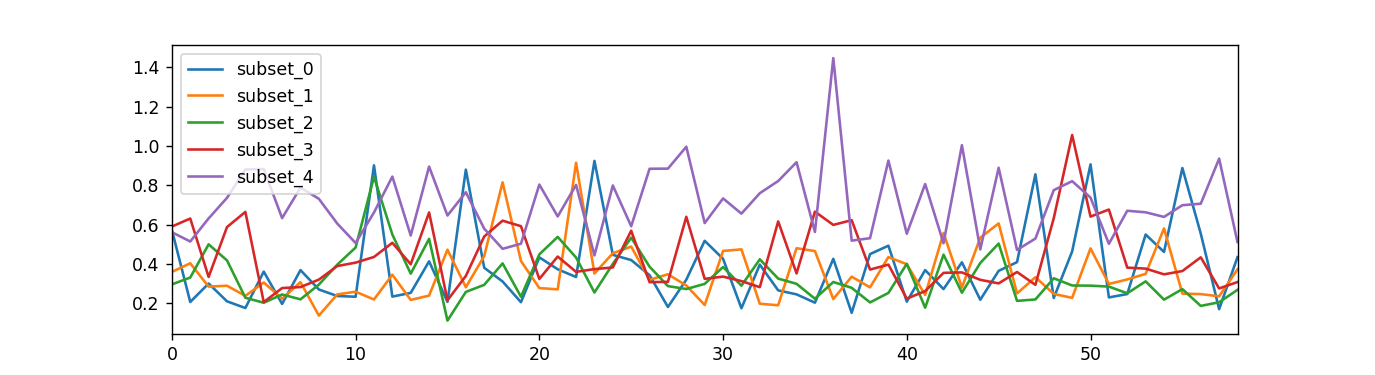

In [48]:
%matplotlib notebook
ax = mse_total.plot(figsize=(11, 3))
fig = ax.get_figure()
fig.savefig('model_eval_max_8.png',dpi=1000)